# Group Deku Project.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Royal Car Dealers has a car yard. They primarily sell new cars but hope to expand into used car sales like other yards. There is a large market for used cars. Because of the large price difference between new and used cars, many people prefer to buy used. There is a scarcity of information available to consumers about the relationship between used car prices and mileage. As a result, consumers may end up paying more or less for a used car than it is actually worth, resulting in financial losses or missed savings opportunities. This issue disproportionately affects first-time car buyers or those with limited knowledge of the used car market.

> **Problem Statement:** The goal of this project is to forecast the price of used cars.

### b) Defining the Metric for Success

> Having a model that accurately  predicts used car prices.

### c) Recording the Experimental Design

- 1.Research Question:What is the relationship between features of a used car and its selling price?
- 2.Data Source: The data set was sourced from Kaggle,but was initially scraped from Car Dekho  website,a prominent car search venture that helps users find new and used cars.
- 3.Variables:The variables included are:'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque','seats'.
- 4.Model assumptions:The assumptions made for this model are:There is linearity,the variance of the residuals is the same for any value of X and observations are independent of each other.
- 5.Model evaluation:The metrics used to evaluate the model’s performance are: R-Squared,adjusted R-Squared,Root Mean Squared Error,Mean Absolute Error. 
- 6.Conclusions and recommendations.


## 2. Loading the Data

In [108]:
#importing relevant libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import re
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model
from scipy.stats import levene
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the Data set
# Dataset url = https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
car_details_df = pd.read_csv("Car details v3.csv")
car_df = car_details_df.copy()
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0




## 3. Data Understanding

The data in use is from [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho) made up of 8128 rows and 13 columns.5 of the columns are categorical and 8 are numerical.
- Name- Model name of the car.
- Year- Model year of the car.
- Selling_price- Price of the car.
- Km_driven
- Fuel- Type of fuel used by the car.
- seller_type-Person selling the car.
- Transmission-car transmission type.
- Owner-
- Mileage-number of kilometers a car runs per litre of fuel.
- Engine -size of the engine.
- Max_power-power of the car.
- Torque-torque of the car
- Seats-Number of seats in the car.


In [3]:
# Determining the no. of records in our dataset
car_df.shape

(8128, 13)

In [4]:
# Previewing the bottom of our dataset
car_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
# Exploring the descriptive statistics of the variables
car_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


> The mean selling price of a second hand car is 6.38 Lakh equivalent of 7856 USD.

> Avaragely ,a second hand car has 698,195 Kilometers driven on it.


In [6]:
# Checking for data set info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 4. External Data Source Validation

>The growing disposable income of the working people is increasing the market growth because this enables individuals to buy vehicles within a limited budget. As per Statistics Canada, disposable incomes in low-class households were augmented by 3% and 3.3% in the initial phase of 2021, respectively. In contrast, incomes in high-class households were reduced by 6.4% and then augmented by 3.9% over the same timeframe. The market growth for used cars witnessed substantial growth in the last few years because of expense competitiveness among new market players along with the inability of major share of customers to buy a new car.

>Data Bridge Market Research analyses that the global used car market was valued at USD 996,906.42 million in 2022 and is expected to reach the value of USD 1700,106.13 million by 2030, at a CAGR of 6.90% during the forecast period.

>This can be seen further [here](https://www.databridgemarketresearch.com/reports/global-used-car-market)


## 5. Tidying the Dataset

In [7]:
# Checking for Outliers
outliers_df = car_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
outliers_df

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
90%,2018.000000,1.025000e+06,1.200000e+05,7.000000
95%,2019.000000,1.950000e+06,1.500000e+05,7.000000
99%,2019.000000,5.200000e+06,2.250000e+05,9.000000


In [8]:
# Identifying the Missing Data
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

> As seen, mileage,engine,maximum power,torque and seats have missing values

In [9]:
# Dropping rows with Missing Data
car_df.dropna(inplace=True)

In [10]:
#Confirm if there are any missing values.
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [11]:
# Identifying the Duplicated Data
car_df.duplicated().sum()

1189

In [12]:
#Dropping duplicated data.
car_df.drop_duplicates(inplace=True)

In [13]:
#Confirm if there are any duplicates.
car_df.duplicated().sum()

0

In [14]:
#checking the dimensions of the new data frame.
car_df.shape

(6717, 13)

In [15]:
# More data cleaning procedures
#creating a function that strips and converts non-numerical data types to numericals.
def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    car_df[col].replace(to_replace, value,inplace = True, regex = True)
replace_data(car_df, "CC", "", "engine")
car_df["engine"] = car_df["engine"].astype(float)

In [16]:
#calling our function.
replace_data(car_df, "km/kg", "", "mileage")
replace_data(car_df, "kmpl", "", "mileage")
car_df["mileage"] = car_df["mileage"].astype(float)

In [17]:
#calling our function.
replace_data(car_df, "bhp", "", "max_power")
car_df["max_power"] = car_df["max_power"].astype(float)

In [18]:
# converting selling_price column from Indian rupee to USD
car_df["selling_price"] = round((car_df["selling_price"]/82),2)

In [19]:
#striping torque
def findFirstFloat(string):
    return re.findall(r"[-+]?(?:\d*\.*\d+)", string)[0]

car_df["torque"] = car_df["torque"].apply(findFirstFloat)
car_df["torque"] = car_df["torque"].astype(float)

In [20]:
#spliting car brand
company_name = car_df['name'].apply(lambda x : x.split(' ')[0])
car_df.insert(1,"company_name",company_name)
car_df.drop(['name'],axis=1,inplace=True)

In [21]:
#create new column for "car age"
from datetime import datetime

def yearTransform(year):
    return datetime.now().year - year

#calling the function
car_df["year"] = car_df["year"].apply(yearTransform)

In [22]:
#confirming change of data types to floats.
df = car_df
car_df.dtypes

company_name      object
year               int64
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [23]:
car_df.isnull().sum()

company_name     0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64



## 6. Exploratory Analysis

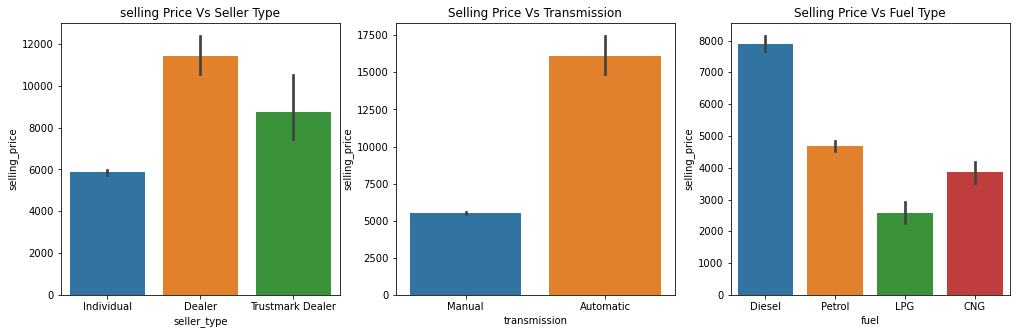

In [24]:
#visualizing distribution of seller types
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_df['seller_type'], car_df['selling_price'])
plt.title('selling Price Vs Seller Type')
#visualizing distribution of transmission types
plt.subplot(1,3,2)
sns.barplot(car_df['transmission'],car_df['selling_price'])
plt.title('Selling Price Vs Transmission')
#visualizing distribution of fuel types.
plt.subplot(1,3,3)
sns.barplot(car_df['fuel'],car_df['selling_price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

> Selling Price of cars seems to have higher prices when sold by Dealers.

> Selling Price would be higher for cars that are Automatic. 

> Selling Price of cars with Fuel Type of Diesel is higher than Petrol, CNG  and LPG

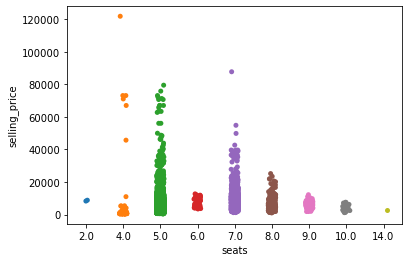

In [25]:
#correlation between selling_price and seats
sns.stripplot(data=car_df, x=car_df['seats'], y=car_df['selling_price']);

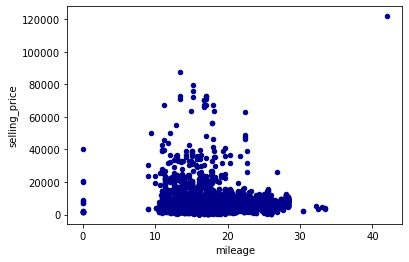

In [26]:
#correlation between selling price and mileage 
ax1 = car_df.plot.scatter(x='mileage',
                       y='selling_price',
                       c='DarkBlue')

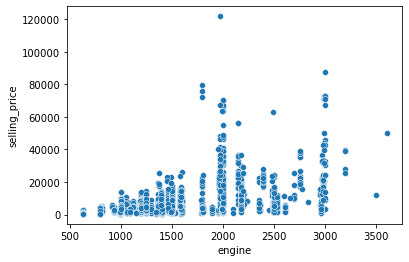

In [27]:
#correlation between engine and selling price
sns.scatterplot(data=car_df, x=car_df['engine'], y=car_df['selling_price']);

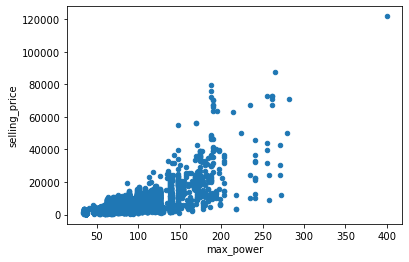

In [28]:
#correlation between maximum power and selling price
ax = car_df.plot.scatter(x='max_power', y='selling_price')

> As seen, cars with a higher power go for a higher price.

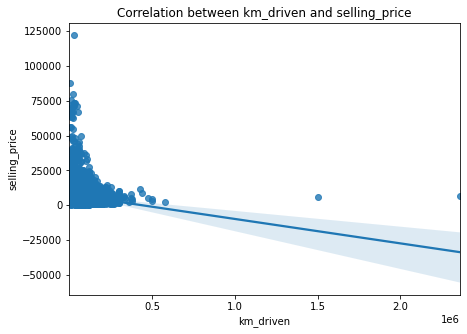

In [29]:
#Correlation between km_driven and selling_price
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between km_driven and selling_price')
sns.regplot(x='km_driven', y='selling_price',data=car_df);

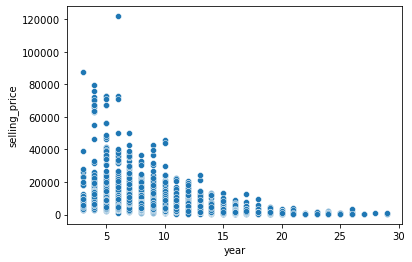

In [30]:
#correlation between model year and selling price
sns.scatterplot(data=car_df, x=car_df['year'], y=car_df['selling_price']);

> As seen, the older the car model is the cheaper the car.

In [31]:
# T transposes the table
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,9.388864,3.897402,3.00,6.00,9.00,12.00,29.00
selling_price,6717.0,6419.341395,6384.761619,365.84,3048.78,5121.95,7926.83,121951.22
km_driven,6717.0,73398.337651,58703.275270,1.00,38000.00,68203.00,100000.00,2360457.00
mileage,6717.0,19.466585,4.048102,0.00,16.80,19.44,22.50,42.00
engine,6717.0,1430.985857,493.469198,624.00,1197.00,1248.00,1498.00,3604.00
max_power,6717.0,87.766100,31.724555,32.80,67.10,81.83,100.00,400.00
torque,6717.0,160.854853,91.630280,4.80,96.00,146.00,200.00,789.00
seats,6717.0,5.434271,0.983805,2.00,5.00,5.00,5.00,14.00


## Outliers

>Using the numpy.percentile() method to compute the values of Q1 and Q3. In addition, we replaced the outliers with numpy.nan as NULL values.

> After we've replaced the outliers with nan, we can use the code below to calculate the sum of null or missing values.

In [32]:
# creating a variable to store numerical columns
num_cols = car_df.select_dtypes(exclude = ['object'])

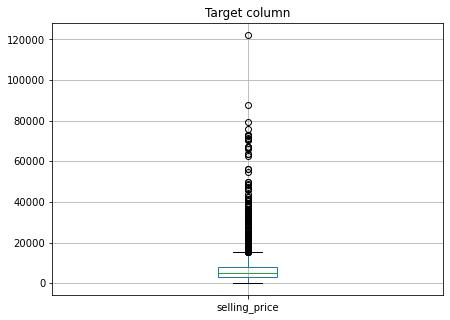

In [33]:
#visualizng outliers for the numerical columns
fig=plt.figure(figsize=(7,5))
car_df.boxplot("selling_price")
plt.title("Target column")
plt.show()

In [34]:
#creating a function that removes outliers
def outlierRemover(df,num_cols):
    for x in [num_cols]:
        q75,q25 = np.percentile(car_df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
    return df

In [35]:
# numerical columns to drop outliers
columns = ["year","selling_price","km_driven","mileage","engine","max_power","torque"]

for c in columns:
    outlierRemover(car_df, c)

In [36]:
NewCarDf = car_df.dropna()
NewCarDf.shape

(5331, 13)

In [37]:
NewCarDf.year.describe()

count    5331.000000
mean        9.129432
std         3.672081
min         3.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        21.000000
Name: year, dtype: float64

In [38]:
categorical_columns = ["owner","seller_type","company_name","fuel","seller_type","transmission","seats", "engine"]

# creating instance of label encoder
labelencoder = LabelEncoder()

for c in categorical_columns:
    NewCarDf[c] = labelencoder.fit_transform(NewCarDf[c])

NewCarDf


,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,8,9.0,5487.80,145500.0,1,1,1,0,23.40,23,74.00,190.0,1
1,12,9.0,4512.20,120000.0,1,1,1,2,21.14,44,103.52,250.0,1
2,4,17.0,1926.83,140000.0,3,1,1,3,17.70,43,78.00,12.7,1
3,5,13.0,2743.90,127000.0,1,1,1,0,23.00,34,90.00,22.4,1
4,8,16.0,1585.37,120000.0,3,1,1,0,16.10,24,88.20,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,8,10.0,3170.73,50000.0,3,1,1,2,18.90,8,67.10,90.0,1
8122,5,9.0,5792.68,80000.0,1,1,1,2,22.54,34,88.73,219.7,1
8123,5,10.0,3902.44,110000.0,3,1,1,0,18.50,20,82.85,113.7,1
8124,5,16.0,1646.34,119000.0,1,1,1,1,16.80,40,110.00,24.0,1


In [39]:
NewCarDf.shape

(5331, 13)

## 7. Implementing the Solution

### Correlations

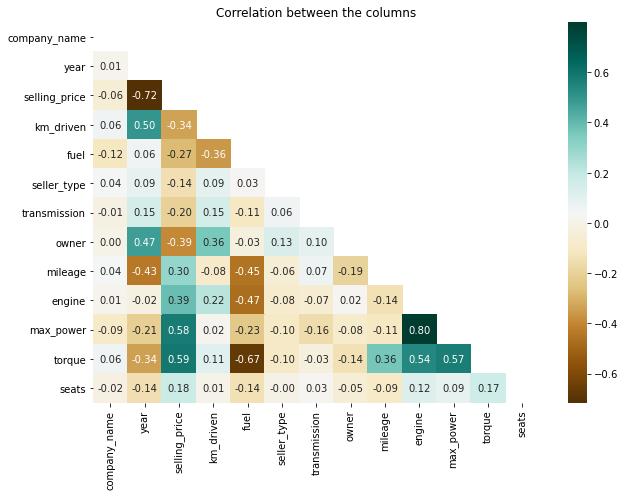

In [40]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(NewCarDf.corr(), dtype=bool))
sns.heatmap(NewCarDf.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

### Checking for multicollinearity  using VIF

In [41]:
# the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = NewCarDf.drop(labels=['selling_price'],axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
pd.DataFrame(vif_data).sort_values(by=['VIF'], ascending=False)

,feature,VIF
9,max_power,76.993171
7,mileage,33.054099
5,transmission,19.201134
10,torque,18.976877
8,engine,17.408316
1,year,12.626894
3,fuel,12.560426
4,seller_type,10.480769
2,km_driven,6.765973
0,company_name,5.653597


### Normality

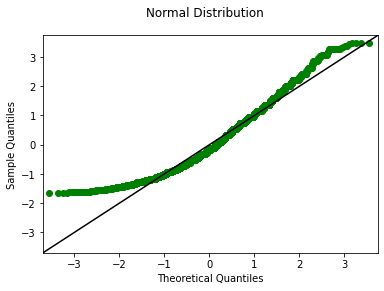

In [42]:
# Plotting a normal distribution visualization 
fig, ax = plt.subplots()
sm.graphics.qqplot(NewCarDf["selling_price"], dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

### Linearity

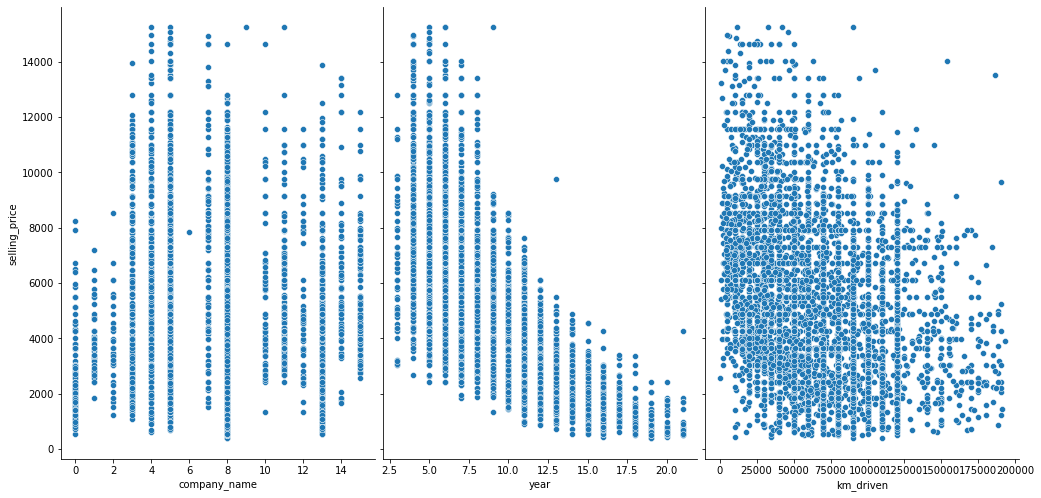

In [59]:
p = sns.pairplot(NewCarDf, x_vars=['company_name','year','km_driven',], y_vars='selling_price', size=7, aspect=0.7 ,diag_kind=None)


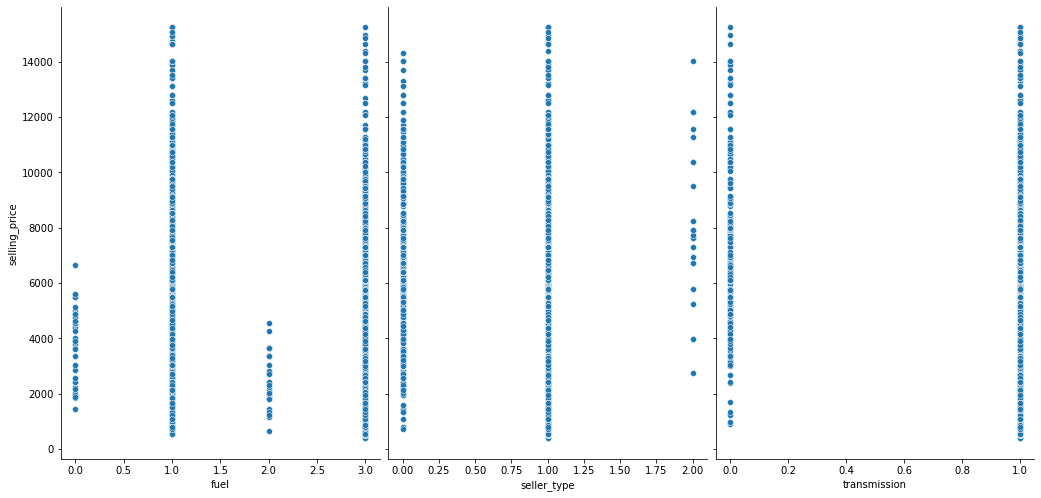

In [60]:
p = sns.pairplot(NewCarDf, x_vars=['fuel','seller_type','transmission'], y_vars='selling_price', size=7, aspect=0.7,diag_kind=None)


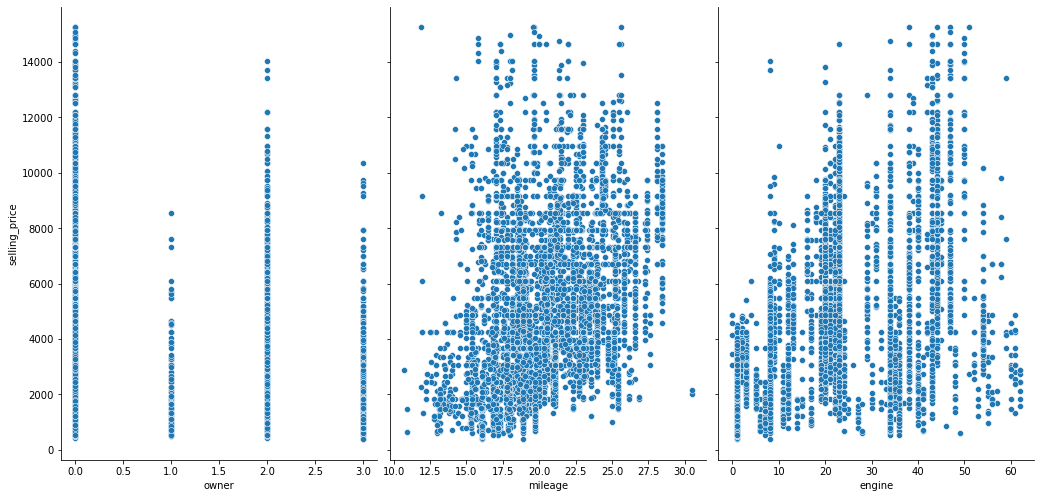

In [61]:
p = sns.pairplot(NewCarDf, x_vars=['owner','mileage','engine'], y_vars='selling_price', size=7, aspect=0.7,diag_kind=None)


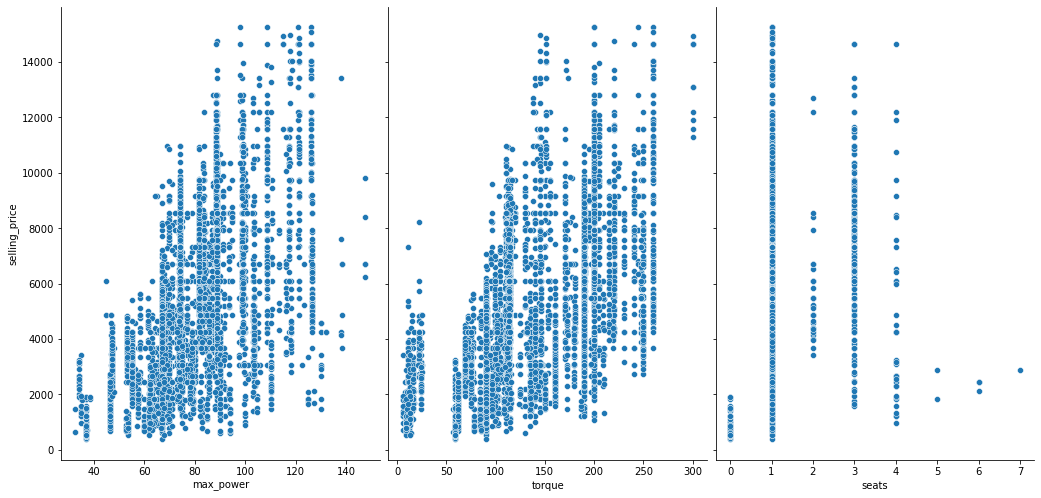

In [63]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(NewCarDf, x_vars=['max_power','torque','seats'], y_vars='selling_price', size=7, aspect=0.7, diag_kind=None)


## Modelling 

In [64]:
# creting model variables
df = NewCarDf.copy(deep=True)

# our target variable will be alcoholic content.
y = df["selling_price"]

# predictors
X = df.drop(labels=['selling_price'],axis=1)

### Using statsmodel

### Scaling the Dataframe to Standard Normal Distribution

> We use StandardScaler from sklearn.preprocessing to normalize each predictor to mean 0 and unit variance.

In [65]:
ss = StandardScaler()

In [66]:
df.columns

Index(['company_name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')

In [67]:
df_scaled = ss.fit_transform(df[df.columns])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0.204153,-0.035251,0.106800,2.070919,-1.039409,0.289758,0.237656,-0.727425,0.840962,-0.069556,-0.287306,0.828746,-0.245669
1,1.380100,-0.035251,-0.231073,1.408858,-1.039409,0.289758,0.237656,1.139644,0.149352,1.399101,1.255107,1.784631,-0.245669
2,-0.971794,2.143554,-1.126449,1.928122,0.944156,0.289758,0.237656,2.073178,-0.903366,1.329165,-0.078307,-1.995894,-0.245669
3,-0.677808,1.054152,-0.843478,1.590601,-1.039409,0.289758,0.237656,-0.727425,0.718554,0.699741,0.548690,-1.841359,-0.245669
4,0.204153,1.871204,-1.244704,1.408858,0.944156,0.289758,0.237656,-0.727425,-1.393002,0.000380,0.454641,-2.015012,-0.245669


In [68]:
#rounding the numbers for display
df_scaled.describe().round(3)

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000,5331.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.148,-1.669,-1.661,-1.707,-2.031,-3.083,-4.208,-0.727,-3.042,-1.678,-2.440,-2.107,-1.999
25%,-0.678,-0.852,-0.780,-0.798,-1.039,0.290,0.238,-0.727,-0.659,-0.769,-0.648,-0.764,-0.246
50%,0.204,-0.308,-0.168,-0.149,0.944,0.290,0.238,-0.727,-0.077,-0.070,-0.031,-0.350,-0.246
75%,0.204,0.782,0.698,0.630,0.944,0.290,0.238,1.140,0.719,0.770,0.482,0.829,-0.246
max,2.262,3.233,3.486,3.304,0.944,3.662,0.238,2.073,3.001,2.658,3.553,2.581,10.274


### Train and split.

In [71]:
#splitting predictors and target variables.
X_scaled = df_scaled.drop(labels="selling_price",axis=1)
y_scaled = df_scaled[["selling_price"]]

In [72]:
# splitting our data into test and training data.
Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = \
train_test_split(X_scaled, y_scaled, test_size=0.33)

### Train model.

In [73]:
# training and fitting the model.
model = LinearRegression()
model.fit(Xscaled_train, yscaled_train)

LinearRegression()

In [74]:
#feauture scaling
cdf_scaled = pd.DataFrame(model.coef_[0],index=Xscaled_train.columns, columns=['coefficients'])
cdf_scaled

,coefficients
company_name,-0.031380
year,-0.457831
km_driven,-0.130065
fuel,-0.134179
seller_type,-0.013413
transmission,-0.056462
owner,-0.064089
mileage,0.013175
engine,-0.061598
max_power,0.389982


> From the table above, we notice max_power has more influence on the Price than other variables. This was not apparent before scaling the data. Further this corroborates the correlation matrix produced during exploratory data analysis.

In [75]:
model.intercept_

array([-0.00418315])

### Model Validation

In [76]:
# check shape of our yscaled
yscaled_train.shape

(3571, 1)

In [77]:
Xscaled_train = sm.add_constant(Xscaled_train)
sm_ols = linear_model.OLS(yscaled_train, Xscaled_train) # i know, the param order is inverse
sm_model = sm_ols.fit()

In [78]:
#getting the model 
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     880.9
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:30:52   Log-Likelihood:                -2574.8
No. Observations:                3571   AIC:                             5176.
Df Residuals:                    3558   BIC:                             5256.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0042      0.008     -0.501      0.616      -0.021       0.012
company_name    -0.0314      0.009     -3.656      0.000      -0.048      -0.015
year            -0.4578      0.013    -36.001      0.000      -0.483      -0.433
km_driven       -0.1301      0.011    -11.970      0.000      -0.151      -0.109
fuel            -0.1342      0.016     -8.274      0.000      -0.166      -0.102
seller_type     -0.0134      0.008     -1.582      0.114      -0.030       0.003
transmission    -0.0565      0.009     -6.393      0.000      -0.074      -0.039
owner           -0.0641      0.010     -6.640      0.000      -0.083      -0.045
mileage          0.0132      0.013      1.027      0.304      -0.012       0.038
engine          -0.0616      0.018     -3.426      0.001      -0.097      -0.026
max_power        0.3900      0.018     22.043      0.000       0.355       0.425
torque           0.1407      0.015      9.159      0.000       0.111       0.171
seats            0.0452      0.009      5.084      0.000       0.028       0.063
==============================================================================
Omnibus:                      180.639   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.769
Skew:                           0.507   Prob(JB):                     2.11e-50
Kurtosis:                       3.714   Cond. No.                         5.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predict for unknown values using the model.

In [79]:
yscaled_predicted = model.predict(Xscaled_test)
residuals_scaled = yscaled_test - yscaled_predicted

### Evaluating the model using charts 

> In addition to the numerical metrics used above, we need to look at the distribution of residuals to evaluate if the model.

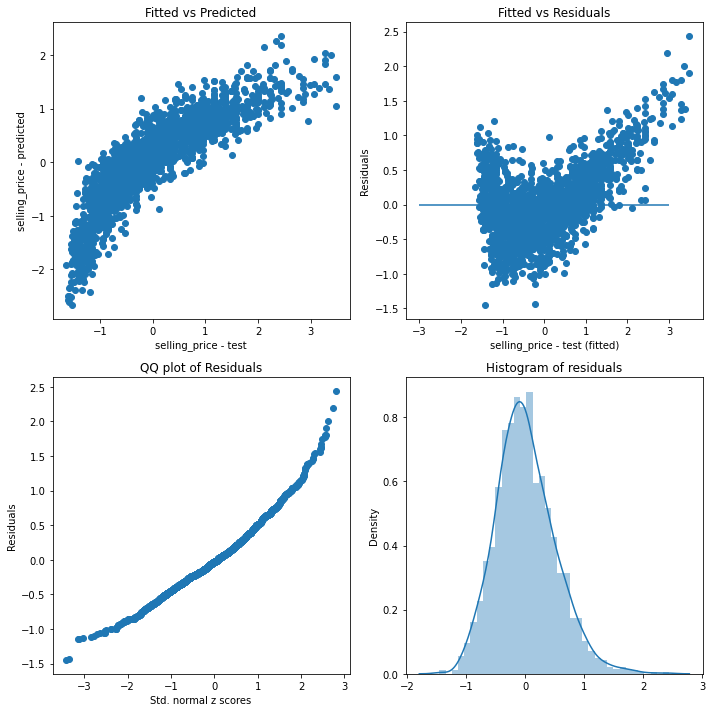

In [80]:
#Plots to compare fitted models vs residuals
fig, axs = plt.subplots(2,2, figsize=(10,10))
# plt.tight_layout()

plt1 = axs[0][0].scatter(x=yscaled_test, y=yscaled_predicted)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('selling_price - test')
axs[0][0].set_ylabel('selling_price - predicted')

plt2 = axs[0][1].scatter(x=yscaled_test, y=residuals_scaled)
axs[0][1].hlines(0, xmin=-3, xmax=3)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('selling_price - test (fitted)')
axs[0][1].set_ylabel('Residuals')

from numpy import random
axs[1][0].scatter(x=sorted(random.randn(len(residuals_scaled))), 
                  y=sorted(residuals_scaled['selling_price']))
axs[1][0].set_title('QQ plot of Residuals')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

sns.distplot(residuals_scaled, ax=axs[1][1])
axs[1][1].set_title('Histogram of residuals')
plt.tight_layout()
plt.show()

#### From the charts above

> Fitted vs predicted chart shows a strong correlation between the predictions and actual values
Fitted vs Residuals chart shows an even distribution around the 0 mean line. There are not patterns evident, which means our model does not leak any errors
Quantile-Quantile plot of residuals vs std. normal and the histogram of residual plots show a sufficiently normal distribution of residuals.
**Thus all assumptions are met.**

#### Inverse Transform the scaled data

In [87]:
Xscaled_train.columns

Index(['const', 'company_name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [88]:
df_fitted = Xscaled_test[Xscaled_test.columns]
df_fitted['s_price'] = yscaled_test
df_fitted.head()

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price
1330,0.792127,0.509451,0.110699,-1.039409,0.289758,0.237656,1.139644,0.302363,0.979485,0.276992,0.988060,-0.245669,-0.547835
1200,-1.265781,0.781801,0.110699,-1.039409,0.289758,0.237656,-0.727425,-0.199514,0.769677,-0.600804,0.350803,-0.245669,-0.843478
2903,-0.677808,-0.852303,-1.576908,0.944156,0.289758,0.237656,-0.727425,-0.536139,-0.279364,0.123377,-0.386025,-0.245669,0.740320
3886,0.204153,-0.579952,-0.668196,-1.039409,0.289758,0.237656,-0.727425,1.183708,-0.069556,0.470316,0.988060,3.260790,1.965126
158,0.204153,-1.124653,-0.408564,-1.039409,0.289758,0.237656,-0.727425,2.371075,-0.069556,-0.286261,0.828746,-0.245669,1.162669


In [89]:
df_fitted_inv = ss.inverse_transform(df_fitted)
df_fitted_inv = pd.DataFrame(df_fitted_inv, 
                                    columns=df_fitted.columns)
df_fitted_inv.head().round(3)

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price
0,10.0,11.0,5499.058,25702.344,2.34,0.985,1.203,1.103,23.853,27.955,98.409,122.560,0.828
1,3.0,12.0,5499.058,25702.344,2.34,0.985,0.783,0.565,23.167,15.404,86.213,122.560,0.659
2,5.0,6.0,626.143,102101.493,2.34,0.985,0.783,0.205,19.739,25.759,72.111,122.560,1.562
3,8.0,7.0,3250.020,25702.344,2.34,0.985,0.783,2.047,20.425,30.720,98.409,342.657,2.261
4,8.0,5.0,3999.699,25702.344,2.34,0.985,0.783,3.319,20.425,19.901,95.360,122.560,1.803


In [90]:
yinv_predicted = (yscaled_predicted * ss.scale_[-1]) + ss.mean_[-1]

In [91]:
yinv_predicted.shape

(1760, 1)

In [92]:
df_fitted_inv['selling_price_predicted'] = yinv_predicted
df_fitted_inv.head().round(3)

,company_name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,s_price,selling_price_predicted
0,10.0,11.0,5499.058,25702.344,2.34,0.985,1.203,1.103,23.853,27.955,98.409,122.560,0.828,1.113
1,3.0,12.0,5499.058,25702.344,2.34,0.985,0.783,0.565,23.167,15.404,86.213,122.560,0.659,0.904
2,5.0,6.0,626.143,102101.493,2.34,0.985,0.783,0.205,19.739,25.759,72.111,122.560,1.562,1.430
3,8.0,7.0,3250.020,25702.344,2.34,0.985,0.783,2.047,20.425,30.720,98.409,342.657,2.261,1.711
4,8.0,5.0,3999.699,25702.344,2.34,0.985,0.783,3.319,20.425,19.901,95.360,122.560,1.803,1.571


### Calculate RMSE

> RMSE root mean squared error. This is useful as it tell you in terms of the dependent variable, what the mean error in prediction is.

In [93]:
mse_scaled = metrics.mean_squared_error(df_fitted_inv['s_price'], 
                           df_fitted_inv['selling_price_predicted'])
np.sqrt(mse_scaled)


0.28843668838680075

In [94]:
mae_scaled = metrics.mean_absolute_error(df_fitted_inv['s_price'], 
                           df_fitted_inv['selling_price_predicted'])
mae_scaled

0.2243826810078326

For the generated data, we have a p-value of about 1.075e-180, so we reject the null hypothesis at an alpha of 0.05. This means we consider the generated data not to be homoscedastic.

### Normality

In [100]:
stat, p = shapiro(NewCarDf['selling_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=0.957, p=0.000
Sample does not look Gaussian


### Homoscedasticity.

In [107]:
het_breuschpagan(sm_model.resid, sm.add_constant(X_scaled))

Our p-value is not only non negative but also close to zero (0) helping us come to a conclusion that the data used in our model is normally distributed.

### Residuals

In [104]:
residuals = sm_model.resid
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Residuals are normally distributed (fail to reject H0)')
else:
    print('Residuals are not normally distributed (reject H0)')

Statistics=0.986, p=0.000
Residuals are not normally distributed (reject H0)


The code is performing a Shapiro-Wilk test, which is a normality test used to check if a sample of data is normally distributed. The test returns a test statistic (in this case, "stat") and a p-value. The null hypothesis for the test is that the sample is normally distributed, so if the p-value is greater than the significance level (alpha) set in the code, we fail to reject the null hypothesis and conclude that the residuals are normally distributed. If the p-value is less than the significance

## 8. Challenging the solution

> The model developed has taken into account factors such as model name, Kilometers driven,type of fuel the car uses,mileage,Maximum power and torque,there are other factors such as whether the car was involved in an accident,the type of interior finishing and other factors that should be considered to improve accuracy of our model. 






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
> As shown by the model as well as Exploratory Analysis,there is substantial evidence that the data used was relevant to answer the main objective.

## 10. Conclusions.

- The model explains 75% of the variation in the selling price of the cars.
- The top factors that affect the selling price are Maximum power,torque and seats.
- For each increase of 1 bhp in max_power , we see an associated increase of about 0.3769 Dollars.
- For each increase of 1 km in km_driven, we see an associated drop of about 0.1118 Dollars.
- Overall, this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about 1000 Dollars.
- The overall model is statistically significant because the p value is less than 0.05
- Selling Price of cars seems to have higher prices when sold by Dealers.
- Selling Price would be higher for cars that are Automatic.
- Selling Price of cars with Fuel Type of Diesel is higher than Petrol, CNG and LPG
